### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys

In [2]:
%matplotlib inline

## How a Computer sees an Image

A computer doesn't have vision as humans do. A computer stores an image as digital data by encoding each pixel in the image as a combination of digital representation of the basic colors in the color model (using 1s and 0s). The most popular color model is `RGB`, although `OpenCV` uses `BGR` color model.

<img src="rgb_color_model.png" height=300 width=600>

The `RGB` color model is also known as `24 bit color (3 channels x 8 bits per channel)`.

`Grayscale` images are usually 8 bits, with 0 representing pure black and 255 representing pure white. The values in between represents some shade of gray. *There are some functions and libraries that only takes grayscale images.*

<img src="images_what_a_computer_sees.png" height=250 width=500> <img src='https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/array.png?token=ADLZD2HNEL33JAKTYRM3B5C7WMIV4' height=250 width=350>

## How OpenCV stores an Image (The Mat Object)

OpenCV uses the `BGR` color model to store images and images are stored as `Mat` (for python, that's `np.ndarray`) objects.

`Mat` is basically a class with two data parts: the `matrix header` (containing information such as the size of the matrix, the method used for storing, at which address is the matrix stored, and so on) and a `pointer` to the matrix containing the pixel values (taking any dimensionality depending on the method chosen for storing) . 

*The matrix header size is constant, however the size of the matrix itself may vary from image to image and usually is larger by orders of magnitude.*

Each Mat object has its own header, however a matrix may be shared between two Mat objects by having their matrix pointers point to the same address.

`The assignment operator and the copy constructor will only copy the headers and the pointer to the large matrix, not the data itself.`

All the copy objects, in the end, point to the same single data matrix and making a modification using any of them will affect all the other ones as well. 

Also, copying only a part of the data to other Mat objects, in practice just provides different access methods to the same underlying data. Nevertheless, their header parts are different. 

But, to copy the matrix itself too, use `cv.Mat.clone()` and `cv.Mat.copyTo()` functions.

## Load, Display and Save an Image using OpenCV ([Docs](https://docs.opencv.org/4.x/db/deb/tutorial_display_image.html))

### Reading an Image

To read an image in opencv we use, `cv.imread(filename, flags)`.

<u>Parameters</u>
- filename: Name of file to be loaded.
- flags: Flag that can take values of [cv.ImreadModes](href=https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80af660544735200cbe942eea09232eb822)

In [3]:
img = cv.imread("cherry_blossom.jpeg")

# print sys.exit statement if the image couldn't be read 
# this is done as usually opencv will only give an warning and not an error

if img is None:
    sys.exit("Couldn't read the image")

In [4]:
# type of the image
type(img)

numpy.ndarray

- The dimensions of an Image

In [5]:
img_dim = img.shape
print("Height of the image is {} pixels.\
      \nWidth of the image is {} pixels.\
      \nAnd, depth of the image is {} which represents the no of color components in the color code."
      .format(img_dim[0], img_dim[1], img_dim[2])
      )

Height of the image is 810 pixels.      
Width of the image is 1080 pixels.      
And, depth of the image is 3 which represents the no of color components in the color code.


### Displaying an Image

- #### Using `cv.imshow(winname, mat)`

This command will create a new window and display the image in that window.

In [6]:
# cv.imshow("cherry blossom", img)

# # wait until user quits (pressing any key will quit the window)
# k = cv.waitKey(0)

# # to save the image in a new file if user input is "s"
# if k == ord("s"):
#     cv.imwrite("starry_night.png", img)

- #### Using matplotlib

Usually using cv.imshow() is not the way we will go. We will use matplotlib to show images inline. This is for a number of reasons.
1. it creates a new window for each image to be shown
2. these instances are usually resource hungry
3. most of the times, when we are using notebooks instead of python scripts, we want to see the image inline. 

There is a little caveat though. Matplotlib uses RGB color model whereas, opencv uses BGR. So, first we will need to convert the color model of the 'mat' to RGB.

For **`color space conversion`**, we can use `cv.cvtColor(input_image, flag)` where, `flag` determines the type of conversion (depending on the defined color space conversion code). See [Color Space Conversion Codes](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0).

In [7]:
# converting color mode from BGR to RGB
def matplotlib_imshow_bgr2rgb(img_title="", mat_img=None, fig_h=10):

    # tinkering with size
    img_width, img_height = mat_img.shape[0], mat_img.shape[1]
    aspect_ratio = img_width/img_height
    plt.figure(figsize=(fig_h*aspect_ratio, fig_h))

    # actual code for displaying the image
    plt.imshow(cv.cvtColor(mat_img, cv.COLOR_BGR2RGB))
    plt.title(img_title)
    plt.show()

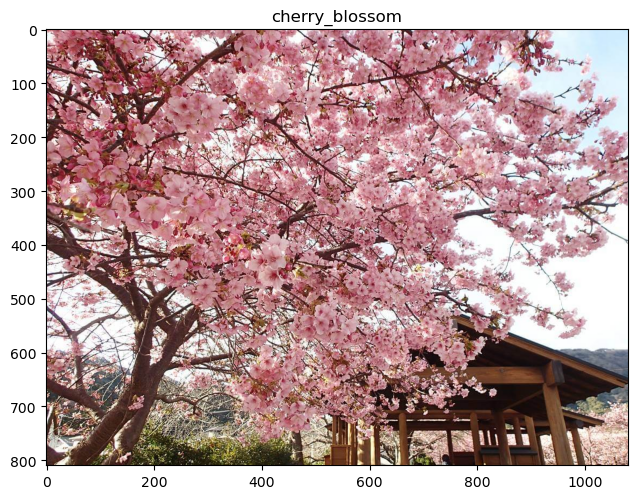

In [8]:
matplotlib_imshow_bgr2rgb('cherry_blossom', img)

## Saving an Image

To save an image in opencv we use, `cv.imwrite(filename, img, flags)`.

<u>Parameters</u>
- filename: Name of the file.
- img (Mat or vector of Mat): Image or Images to be saved.
- params: Format-specific parameters encoded as pairs (paramId_1, paramValue_1, paramId_2, paramValue_2, ... .) see [cv.ImwriteFlags](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac).



In [9]:
# let's first convert the image to greyscale using color space conversion and then we will save it

img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # no it's not wrong, grey is uk spelling
cv.imwrite("cherry_blossom_grey.png", img_grey)

True